In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
from citipy import citipy

In [4]:
# Create a list for holding the cities.
cities = []

# Identify nearest city for each latitude and longitude combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d47f5a4bf2ff39107cc44a41e897a586


In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | tuktoyaktuk
Processing Record 2 of Set 1 | comodoro rivadavia
Processing Record 3 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 4 of Set 1 | castro
Processing Record 5 of Set 1 | nsanje
Processing Record 6 of Set 1 | avera
Processing Record 7 of Set 1 | sulya
Processing Record 8 of Set 1 | bilma
Processing Record 9 of Set 1 | new norfolk
Processing Record 10 of Set 1 | les cayes
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | esperance
Processing Record 13 of Set 1 | batagay-alyta
Processing Record 14 of Set 1 | najran
Processing Record 15 of Set 1 | amderma
City not found. Skipping...
Processing Record 16 of Set 1 | constitucion
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | hilo
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | hobart
Processing Record 21 of Set 1 | rawson
Processing Record 22 of Set 1 | albany
Processing Record 23 of Set 1 | port elizabeth
Pro

Processing Record 38 of Set 4 | russell
Processing Record 39 of Set 4 | menongue
Processing Record 40 of Set 4 | port moresby
Processing Record 41 of Set 4 | nagorsk
Processing Record 42 of Set 4 | avarua
Processing Record 43 of Set 4 | acapulco
Processing Record 44 of Set 4 | lompoc
Processing Record 45 of Set 4 | yerbogachen
Processing Record 46 of Set 4 | sechura
Processing Record 47 of Set 4 | zhezkazgan
Processing Record 48 of Set 4 | upernavik
Processing Record 49 of Set 4 | clyde river
Processing Record 50 of Set 4 | anuradhapura
Processing Record 1 of Set 5 | bathsheba
Processing Record 2 of Set 5 | adrar
Processing Record 3 of Set 5 | spearfish
Processing Record 4 of Set 5 | tallahassee
Processing Record 5 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 6 of Set 5 | cajuru
Processing Record 7 of Set 5 | tornio
Processing Record 8 of Set 5 | khasan
Processing Record 9 of Set 5 | ilulissat
Processing Record 10 of Set 5 | iqaluit
Processing Record 11 of Set 

Processing Record 26 of Set 8 | alexandria
Processing Record 27 of Set 8 | male
Processing Record 28 of Set 8 | waingapu
Processing Record 29 of Set 8 | karratha
Processing Record 30 of Set 8 | ode
Processing Record 31 of Set 8 | mount gambier
Processing Record 32 of Set 8 | tanout
Processing Record 33 of Set 8 | jalu
Processing Record 34 of Set 8 | westport
Processing Record 35 of Set 8 | mantua
Processing Record 36 of Set 8 | hinton
Processing Record 37 of Set 8 | alyangula
Processing Record 38 of Set 8 | pahrump
Processing Record 39 of Set 8 | praxedis guerrero
Processing Record 40 of Set 8 | sarab
Processing Record 41 of Set 8 | sol-iletsk
Processing Record 42 of Set 8 | kruisfontein
Processing Record 43 of Set 8 | syriam
Processing Record 44 of Set 8 | luau
Processing Record 45 of Set 8 | quincy
Processing Record 46 of Set 8 | barreirinhas
Processing Record 47 of Set 8 | college
Processing Record 48 of Set 8 | manaure
Processing Record 49 of Set 8 | totness
Processing Record 50 of

Processing Record 15 of Set 12 | gurgan
City not found. Skipping...
Processing Record 16 of Set 12 | lagos
Processing Record 17 of Set 12 | san ramon
Processing Record 18 of Set 12 | abu dhabi
Processing Record 19 of Set 12 | kuruman
Processing Record 20 of Set 12 | lata
Processing Record 21 of Set 12 | njinikom
Processing Record 22 of Set 12 | vyartsilya
Processing Record 23 of Set 12 | sheridan
Processing Record 24 of Set 12 | humaita
Processing Record 25 of Set 12 | tarata
Processing Record 26 of Set 12 | svetlaya
Processing Record 27 of Set 12 | dir
Processing Record 28 of Set 12 | beisfjord
Processing Record 29 of Set 12 | winslow
Processing Record 30 of Set 12 | port blair
Processing Record 31 of Set 12 | mangla
Processing Record 32 of Set 12 | potosi
Processing Record 33 of Set 12 | lagoa vermelha
Processing Record 34 of Set 12 | hai phong
City not found. Skipping...
Processing Record 35 of Set 12 | rocha
Processing Record 36 of Set 12 | nikolayevsk-na-amure
Processing Record 37

In [10]:
len(city_data)

554

In [31]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(30)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tuktoyaktuk,69.4541,-133.0374,50.00,46,0,8.05,CA,2022-06-14 21:41:28
1,Comodoro Rivadavia,-45.8667,-67.5000,48.06,71,0,3.44,AR,2022-06-14 21:36:54
2,Castro,-24.7911,-50.0119,47.26,93,0,4.79,BR,2022-06-14 21:41:28
3,Nsanje,-16.9200,35.2620,64.76,89,0,2.30,MW,2022-06-14 21:41:29
4,Avera,33.1940,-82.5271,86.05,40,59,9.57,US,2022-06-14 21:41:29
5,Sulya,12.5667,75.3833,75.31,96,74,1.90,IN,2022-06-14 21:41:29
6,Bilma,18.6853,12.9164,93.94,24,82,6.22,NE,2022-06-14 21:41:29
7,New Norfolk,-42.7826,147.0587,44.71,83,100,2.59,AU,2022-06-14 21:41:30
8,Les Cayes,18.2000,-73.7500,82.27,69,100,6.93,HT,2022-06-14 21:41:30
9,Rikitea,-23.1203,-134.9692,72.95,70,47,8.99,PF,2022-06-14 21:41:30


In [32]:
# Reorder column in the dataframe
city_data_new_column=["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df= city_data_df[city_data_new_column]
city_data_df.head(30)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tuktoyaktuk,CA,2022-06-14 21:41:28,69.4541,-133.0374,50.00,46,0,8.05
1,Comodoro Rivadavia,AR,2022-06-14 21:36:54,-45.8667,-67.5000,48.06,71,0,3.44
2,Castro,BR,2022-06-14 21:41:28,-24.7911,-50.0119,47.26,93,0,4.79
3,Nsanje,MW,2022-06-14 21:41:29,-16.9200,35.2620,64.76,89,0,2.30
4,Avera,US,2022-06-14 21:41:29,33.1940,-82.5271,86.05,40,59,9.57
5,Sulya,IN,2022-06-14 21:41:29,12.5667,75.3833,75.31,96,74,1.90
6,Bilma,NE,2022-06-14 21:41:29,18.6853,12.9164,93.94,24,82,6.22
7,New Norfolk,AU,2022-06-14 21:41:30,-42.7826,147.0587,44.71,83,100,2.59
8,Les Cayes,HT,2022-06-14 21:41:30,18.2000,-73.7500,82.27,69,100,6.93
9,Rikitea,PF,2022-06-14 21:41:30,-23.1203,-134.9692,72.95,70,47,8.99


In [27]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [28]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

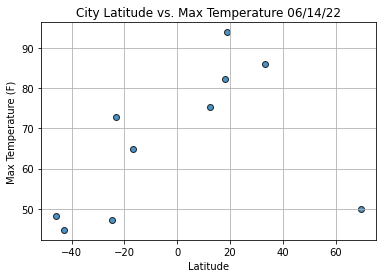

In [36]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()